## Numerical Example

- This Jupyter notebook presents the results related to Section 3.1, Inspecting the Trade-off. It includes the illustration of Figure 2.

In [1]:
import bcw_bj as main
import hlmw as hlmw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import brentq, fsolve
#import tikzplotlib
import time

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

In [3]:
font = {'family' : 'serif','weight':'normal',
        'size'   : 10}
plt.rc('font', **font)

The arbitrary parameters are as follows:

In [4]:
σ_DM=0.6
Ubar_CM=1.8000
n=0.8
α_1=0.6
β=0.981
τ_min=β-1
τ_max = 0.1
τgrid_size = 120

In [5]:
model = main.baseline_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)

model_hlmw =hlmw.hlmw_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)

In [6]:
z_guess = 0.5
i_guess = 0.01
τ = 0

tic = time.time()
z, i = model.solve_z_i(z_guess, i_guess, τ) 
toc = time.time() - tic
print(z, i, toc)

0.636393757371773 0.019651191771701104 0.5073390007019043


In [7]:
ρ_grid = model.support_grid_func(z, i, τ)

In [8]:
ξ = [model.ξ_demand_func(ρ, i, z) for ρ in ρ_grid]

In [9]:
ρq = [model.q_expenditure(ρ, i, z) for ρ in ρ_grid]

In [10]:
F = model.F_func(i, z,τ)

In [11]:
dF = model.dF_normalization_func(z, i, τ)

In [12]:
# Recall: baseline z and i, given τ = 0.0
z,i

(0.636393757371773, 0.019651191771701104)

In [13]:
z_hlmw = model_hlmw.z_solver(τ)
z_hlmw

0.8079676303037241

In [14]:
ρ_grid_hlmw =model_hlmw.support_grid_func(z_hlmw, τ)

ρq_hlmw = [model_hlmw.q_expenditure(ρ, z_hlmw) for ρ in ρ_grid_hlmw]
F_hlmw = model_hlmw.F_func(z_hlmw,τ)
dF_hlmw = model_hlmw.dF_normalization_func(z_hlmw,τ)

## Figure 2: Liquidity-risk insurance and price dispersion effects given policy

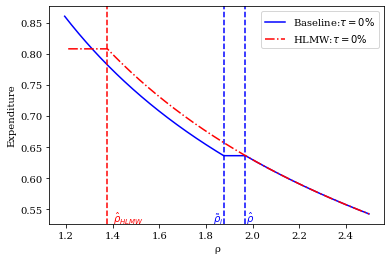

In [15]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, ρq, color='blue', label="Baseline:" r"$\tau=0\%$")
#plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.83, 0.53, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='blue')
plt.text(1.97, 0.53, r"$\hat{\rho}$", color='blue')
plt.plot(ρ_grid_hlmw, ρq_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0\%$")
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.4, 0.53, r"$\hat{\rho}_{HLMW}$", color='red')
plt.ylabel('Expenditure')
plt.xlabel('ρ')
plt.legend()
plt.savefig("Figure_1_a.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("klln_hlmw_expenditure.tex")
#tikzplotlib.save("klln_hlmw_expenditure.pgf")


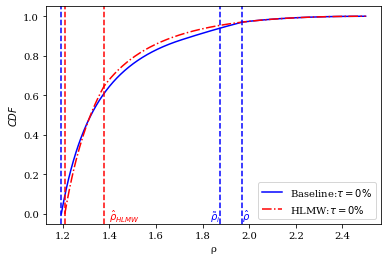

In [16]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, F, color='blue', label="Baseline:" r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.plot(ρ_grid_hlmw, F_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0\%$")
plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='red')

plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.83, -0.03, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='blue')
plt.text(1.97, -0.03, r"$\hat{\rho}$", color='blue')

#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.4, -0.03, r"$\hat{\rho}_{HLMW}$", color='red')

plt.ylabel(r"$CDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("Figure_1_b.png", bbox_inches='tight', pad_inches=0.05)

plt.show()


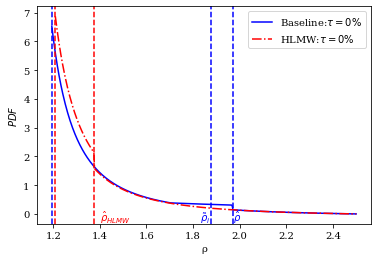

In [17]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, dF, color='blue', label="Baseline:" r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.plot(ρ_grid_hlmw, dF_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0\%$")
plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='red')

plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.83, -0.25, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='blue')
plt.text(1.97, -0.25, r"$\hat{\rho}$", color='blue')

#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.4, -0.25, r"$\hat{\rho}_{HLMW}$", color='red')

plt.ylabel(r"$PDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("Figure_1_c.png", bbox_inches='tight', pad_inches=0.05)
#plt.xlim(1,1.1)
plt.show()
